C:\Users\KAKAREM\anaconda3\envs\tf2-gpu\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


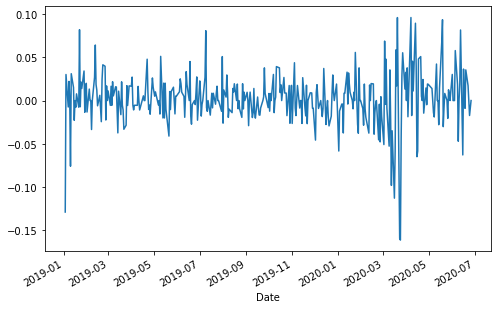

In [1]:
import pandas_datareader as pdr
import numpy as np
import datetime
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import mplfinance as mpf
#from mplfinance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc

COM7 = pdr.get_data_yahoo('COM7.BK', 
                          start=datetime.datetime(2019, 1, 1), 
                          end=datetime.datetime(2020, 6, 26))


#COM7 = web.DataReader(company,'yahoo',start,end)

COM7['log_return'] = np.log(COM7['Adj Close'] / COM7['Adj Close'].shift(1))  #formula_SimpleReturn
COM7.to_csv (r'C:\Users\KAKAREM\Desktop\LH.csv',index = False,  header=True)    #Save.csv(excel)

#print(COM7)
#print(COM7.index)     #ดูจำนวนวัน
#print(COM7.shape[0])  #check_theNumber_Column0
#print(COM7.tail())


# Plot Graph ดู
COM7['log_return'].plot(figsize=(8,5))

# หาค่าเฉลี่ย #
log_return_d = COM7['log_return'].mean()
#print(log_return_d)

# เอาค่าเฉลี่ยมาคูณ 250 วัน คือ จำนวนวันทั้งปี
log_return_a = log_return_d * 250
#print(log_return_a)

# Logarithmic Rate Return ต่อ 1 ปี
#print (str(round(log_return_a * 100, 5)) + ' %')

In [19]:
COM7.head()

,High,Low,Open,Close,Volume,Adj Close,log_return
Date,,,,,,,
2019-01-02,15.6,14.5,15.6,14.9,10059100.0,14.392361,NaN
2019-01-03,15.0,13.0,15.0,13.1,28487000.0,12.653687,-0.128749
2019-01-04,13.6,11.5,12.7,13.5,70530900.0,13.040059,0.030077
2019-01-07,13.9,13.4,13.7,13.4,22442300.0,12.943465,-0.007435
2019-01-08,14.3,13.3,13.5,13.7,26323500.0,13.233244,0.022141


In [20]:
COM7.tail()

,High,Low,Open,Close,Volume,Adj Close,log_return
Date,,,,,,,
2020-06-22,29.50,28.50,28.5,29.25,9382200.0,29.25,0.017242
2020-06-23,30.50,29.00,29.5,29.25,14604600.0,29.25,0.000000
2020-06-24,29.75,28.50,29.5,28.75,11699900.0,28.75,-0.017242
2020-06-25,28.75,27.25,27.5,28.50,14249100.0,28.50,-0.008734
2020-06-26,29.00,27.75,29.0,28.50,8536400.0,28.50,0.000000


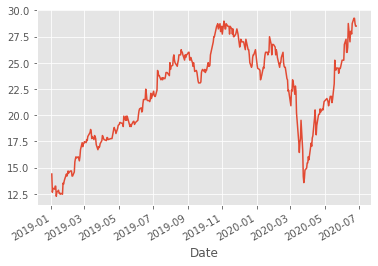

In [21]:
style.use('ggplot')
COM7['Adj Close'].plot()
plt.show()

<BarContainer object of 365 artists>

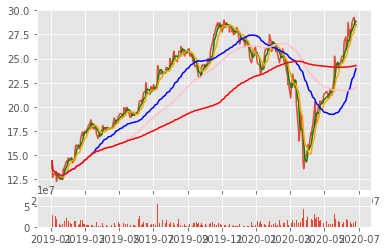

In [22]:
COM7_copy=COM7.copy()
COM7_copy['5ma'] = COM7['Adj Close'].rolling(window=5,min_periods=0).mean()
COM7_copy['10ma'] = COM7['Adj Close'].rolling(window=10,min_periods=0).mean()

COM7_copy['50ma'] = COM7['Adj Close'].rolling(window=50,min_periods=0).mean()
COM7_copy['89ma'] = COM7['Adj Close'].rolling(window=89,min_periods=0).mean()
COM7_copy['200ma'] = COM7['Adj Close'].rolling(window=200,min_periods=0).mean()

ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)

ax1.plot(COM7.index, COM7['Adj Close'])
ax1.plot(COM7_copy.index, COM7_copy['5ma'],   color = 'green')
ax1.plot(COM7_copy.index, COM7_copy['10ma'],  color = 'orange')
ax1.plot(COM7_copy.index, COM7_copy['50ma'],  color = 'blue')
ax1.plot(COM7_copy.index, COM7_copy['89ma'],  color = 'pink')
ax1.plot(COM7_copy.index, COM7_copy['200ma'], color = 'red')

ax2.bar(COM7.index, COM7['Volume'])

In [23]:
(COM7_copy.tail())

,High,Low,Open,Close,Volume,Adj Close,log_return,5ma,10ma,50ma,89ma,200ma
Date,,,,,,,,,,,,
2020-06-22,29.50,28.50,28.5,29.25,9382200.0,29.25,0.017242,28.35,27.600,23.099228,21.848291,24.211195
2020-06-23,30.50,29.00,29.5,29.25,14604600.0,29.25,0.000000,28.60,27.925,23.343428,21.895874,24.228655
2020-06-24,29.75,28.50,29.5,28.75,11699900.0,28.75,-0.017242,28.75,28.200,23.561777,21.937839,24.242376
2020-06-25,28.75,27.25,27.5,28.50,14249100.0,28.50,-0.008734,28.90,28.400,23.771163,21.971429,24.254847
2020-06-26,29.00,27.75,29.0,28.50,8536400.0,28.50,0.000000,28.85,28.375,23.946865,21.999454,24.271033


In [24]:
COM7_ohlc= COM7['Adj Close'].resample('10D').ohlc()
COM7_volume= COM7['Volume'].resample('10D').sum()

COM7_ohlc.reset_index(inplace=True)
COM7_ohlc['Date']=COM7_ohlc['Date'].map(mdates.date2num)
print(COM7_ohlc.head())

       Date       open       high        low      close
0  737061.0  14.392361  14.392361  12.267314  12.653687
1  737071.0  12.846873  12.846873  12.460501  12.460501
2  737081.0  13.523024  14.682140  13.426430  14.682140
3  737091.0  14.488954  14.682140  14.199175  14.199175
4  737101.0  14.585547  16.034443  14.585547  15.648071


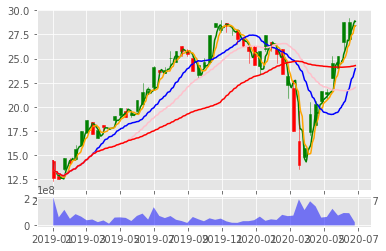

In [25]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
ax1.plot(COM7_copy.index, COM7_copy['5ma'],   color = 'green')
ax1.plot(COM7_copy.index, COM7_copy['10ma'],  color = 'orange')
ax1.plot(COM7_copy.index, COM7_copy['50ma'],  color = 'blue')
ax1.plot(COM7_copy.index, COM7_copy['89ma'],  color = 'pink')
ax1.plot(COM7_copy.index, COM7_copy['200ma'], color = 'red')
candlestick_ohlc(ax1, COM7_ohlc.values,width=5,colorup='green')
ax2.fill_between(COM7_volume.index.map(mdates.date2num),COM7_volume.values,0,facecolor='b', alpha=0.5)
plt.show()

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import matplotlib.pyplot as plt
def create_dataset(ticker, daysPrediction=50,splitProportion=0.8):
    #Read data
    #COM7 = pd.read_csv('set.csv')
    COM7 = pdr.get_data_yahoo('COM7.BK', 
                         start=datetime.datetime(2019, 1, 1), 
                          end=datetime.datetime(2019, 12, 31))
    tickers = COM7.columns.values.tolist()
    COM7.to_csv (r'C:\Users\KAKAREM\Desktop\LH.csv',index = False,  header=True)  

    #Get Adj Close values of ticker and convert it to numpy array
    values = COM7[ticker].values
    values=values.reshape(-1,1)

    #Split the dataset in the training set and test set
    dataset_train = np.array(values[:int(values.shape[0] * splitProportion)])
    dataset_test = np.array(values[int(values.shape[0] * splitProportion) - daysPrediction:])

    #Normalize dataset in range [0-1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset_train = scaler.fit_transform(dataset_train)
    dataset_test = scaler.transform(dataset_test)

    #Create the X and Y variables of the dataset in a format numpy array
    x_train, y_train = create_d_dataset(dataset_train,daysPrediction)
    x_test, y_test = create_d_dataset(dataset_test,daysPrediction)

    #Prepare data for the neural network
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    #Return dataset and other data
    return x_test,y_test,x_train,y_train,df,ticker,scaler,values

def create_d_dataset(val,daysPrediction):

    x = []
    y = []
    for i in range(daysPrediction, val.shape[0]):
        x.append(val[i-daysPrediction:i, 0])
        y.append(val[i, 0])
    x = np.array(x)
    y = np.array(y)

    return x,y


def train(train_x,train_y,ticker):
    #Create LSTM RNN model
 
    model = Sequential()
   
    model.add(LSTM(units=96, return_sequences=True, input_shape=(train_x.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
  
    #Train network and save it
    if (not os.path.exists(f'stock_prediction-{ticker}.h5')):
        model.fit(train_x, train_y, epochs=3, batch_size=32)
        model.save(f'stock_prediction-{ticker}.h5')

def show_results(test_x,test_y,train_y,ticker,scaler,values,COM7):
    #Load the trained neural network
    model = load_model(f'stock_prediction-{ticker}.h5')

    #Use the network to to predict the test dataset
    predictions = model.predict(test_x)
    predictions = scaler.inverse_transform(predictions)
    

    #Graphically see the prediction of the neural network
    fig, ax = plt.subplots(figsize=(20, 10))
   
    y_test_scaled = scaler.inverse_transform(test_y.reshape(-1, 1))
    ax.plot(y_test_scaled, color=(0, 0, 0.7, 0.5), label="True Price")
    plt.plot(predictions, color=(0, 0.7, 0,0.5),
            label='Predicted Testing Price')
    plt.legend()
    
    #Temporal
    fig, ax2 = plt.subplots(figsize=(20, 10))
    plt.plot(COM7[ticker].values, color=(0, 0, 0.7, 0.5), label="True Price")
    ax2.plot(range(len(train_y) + 50, len(train_y) + 50 + len(predictions)), predictions, color=(0, 0.7, 0,0.5),
             label='Predicted Testing Price')
    plt.legend()

def predictFuture(ticker):
    #Create the dataset with the given ticker
    x_test,y_test,x_train,y_train,COM7,ticker,scaler,values=create_dataset(ticker)

    #Train the RNN network
    train(x_train,y_train,ticker=ticker)

    #Show results of the training
    show_results(x_test,y_test, y_train,ticker,scaler,values,COM7)

In [91]:
predictFuture(COM7)

ValueError: Boolean array expected for the condition, not float64